## **1.	Outliers**

### **1.10.	Outlier Visualization, Detection, Validation & Document, and Removal (Coding)**

#### **1.10.2.	Z-Score**

#### **Impute/Import Outlier Dataset from GitHub**

In [77]:
# Import necessary libraries
import pandas as pd

# Load the dataset from github (RAW link)
df = pd.read_csv("https://raw.githubusercontent.com/tabassumgulfaraz-ds/machine_learning_1.0/main/files_and_datasets/f_ds5_III/outlier_dataset.csv")

# check the shape i.e. number of rows and columns also called dimensions of the dataset
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (30, 5)


#### **Step 1: Select Appropriate Libraries**

In [78]:
# Import required libraries

import pandas as pd        # Data manipulation
import numpy as np         # Numerical operations
import matplotlib.pyplot as plt   # Visualization
import seaborn as sns      # Advanced visualization
from scipy import stats    # For Z-score calculation

#### **Step 2: Visualize Outliers (Boxplots Before Z-Score)**

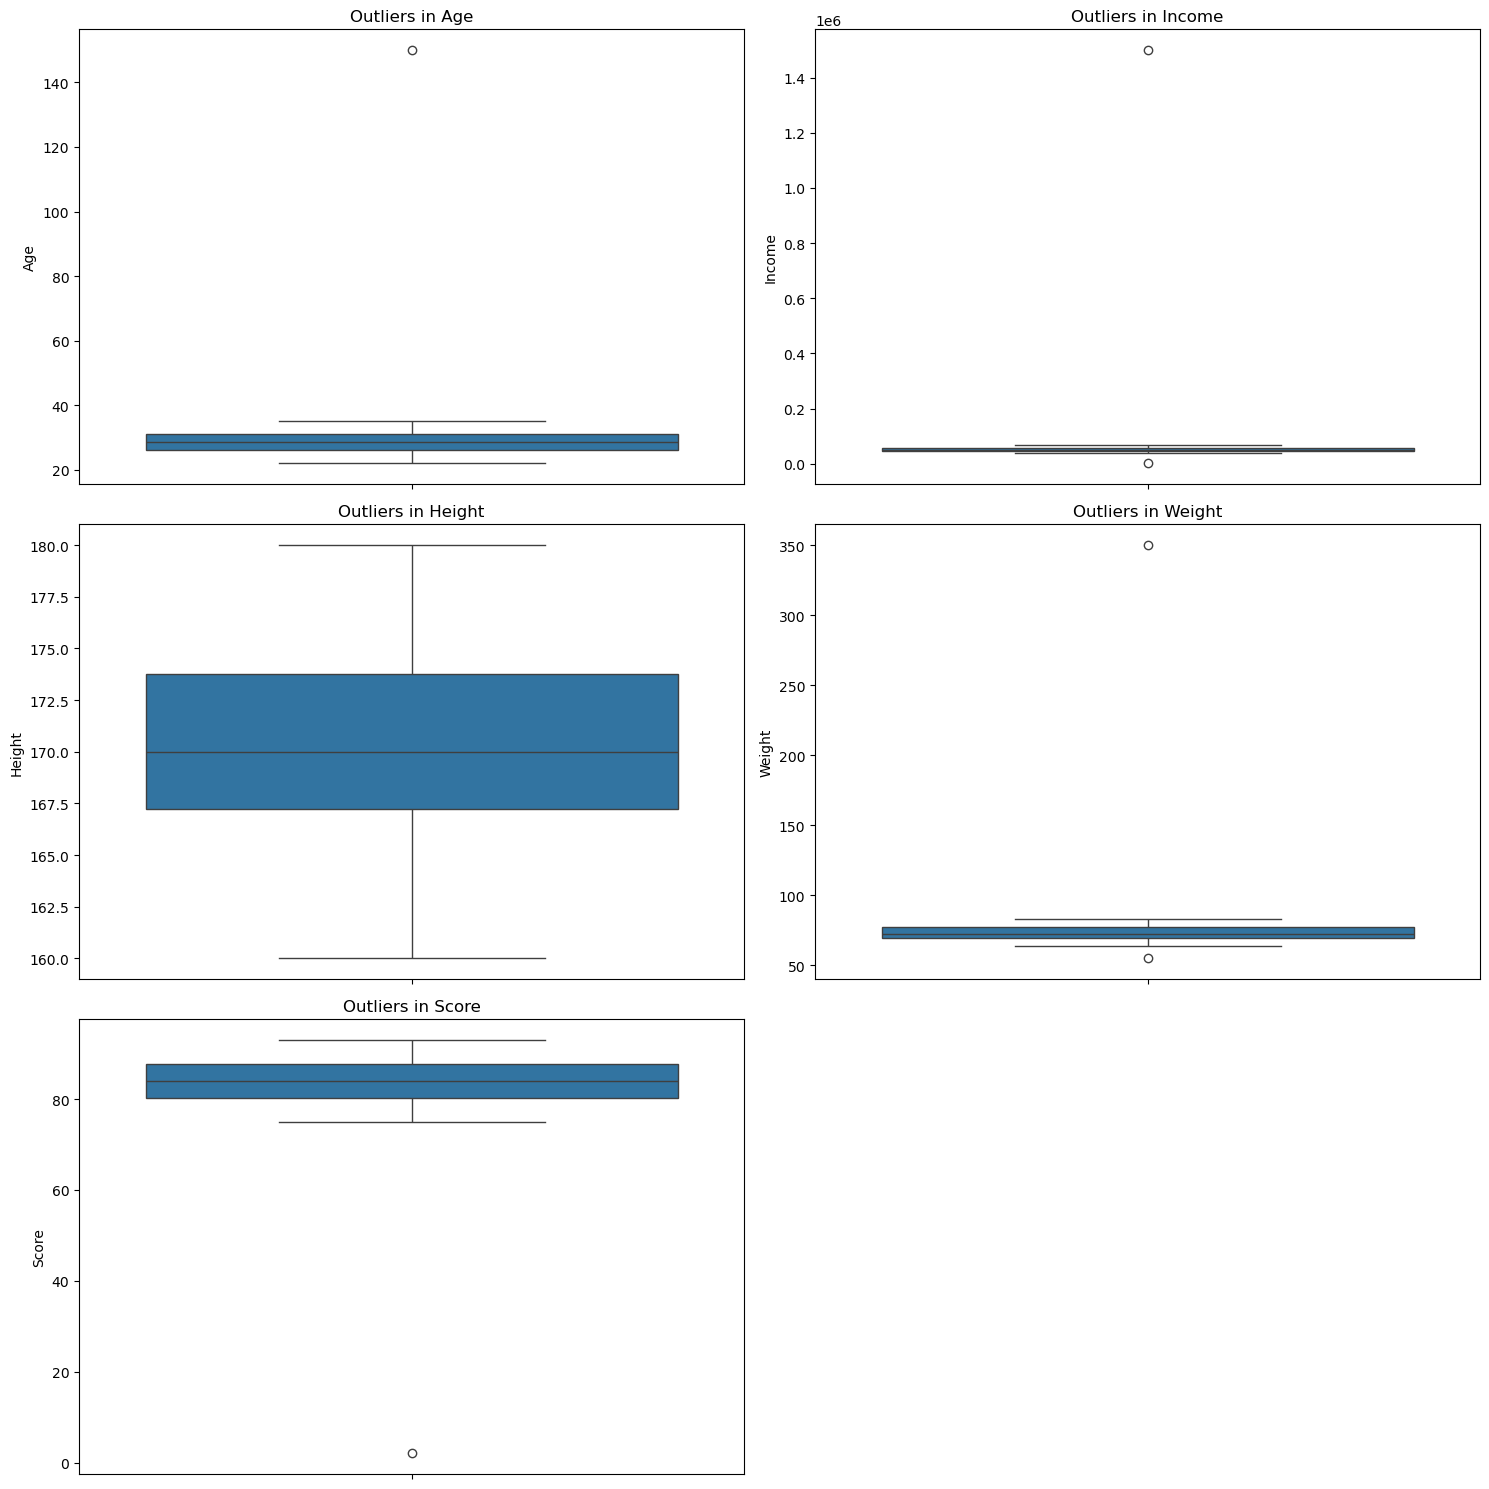

In [79]:
# Select numeric columns only (Z-score works only on numeric data)
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Set subplot layout
n_cols = 2
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

plt.figure(figsize=(15, 5 * n_rows))

# Create boxplot for each numeric column
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col])
    plt.title(f'Outliers in {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

#### **Step 3: Distribution Skew or Normal**

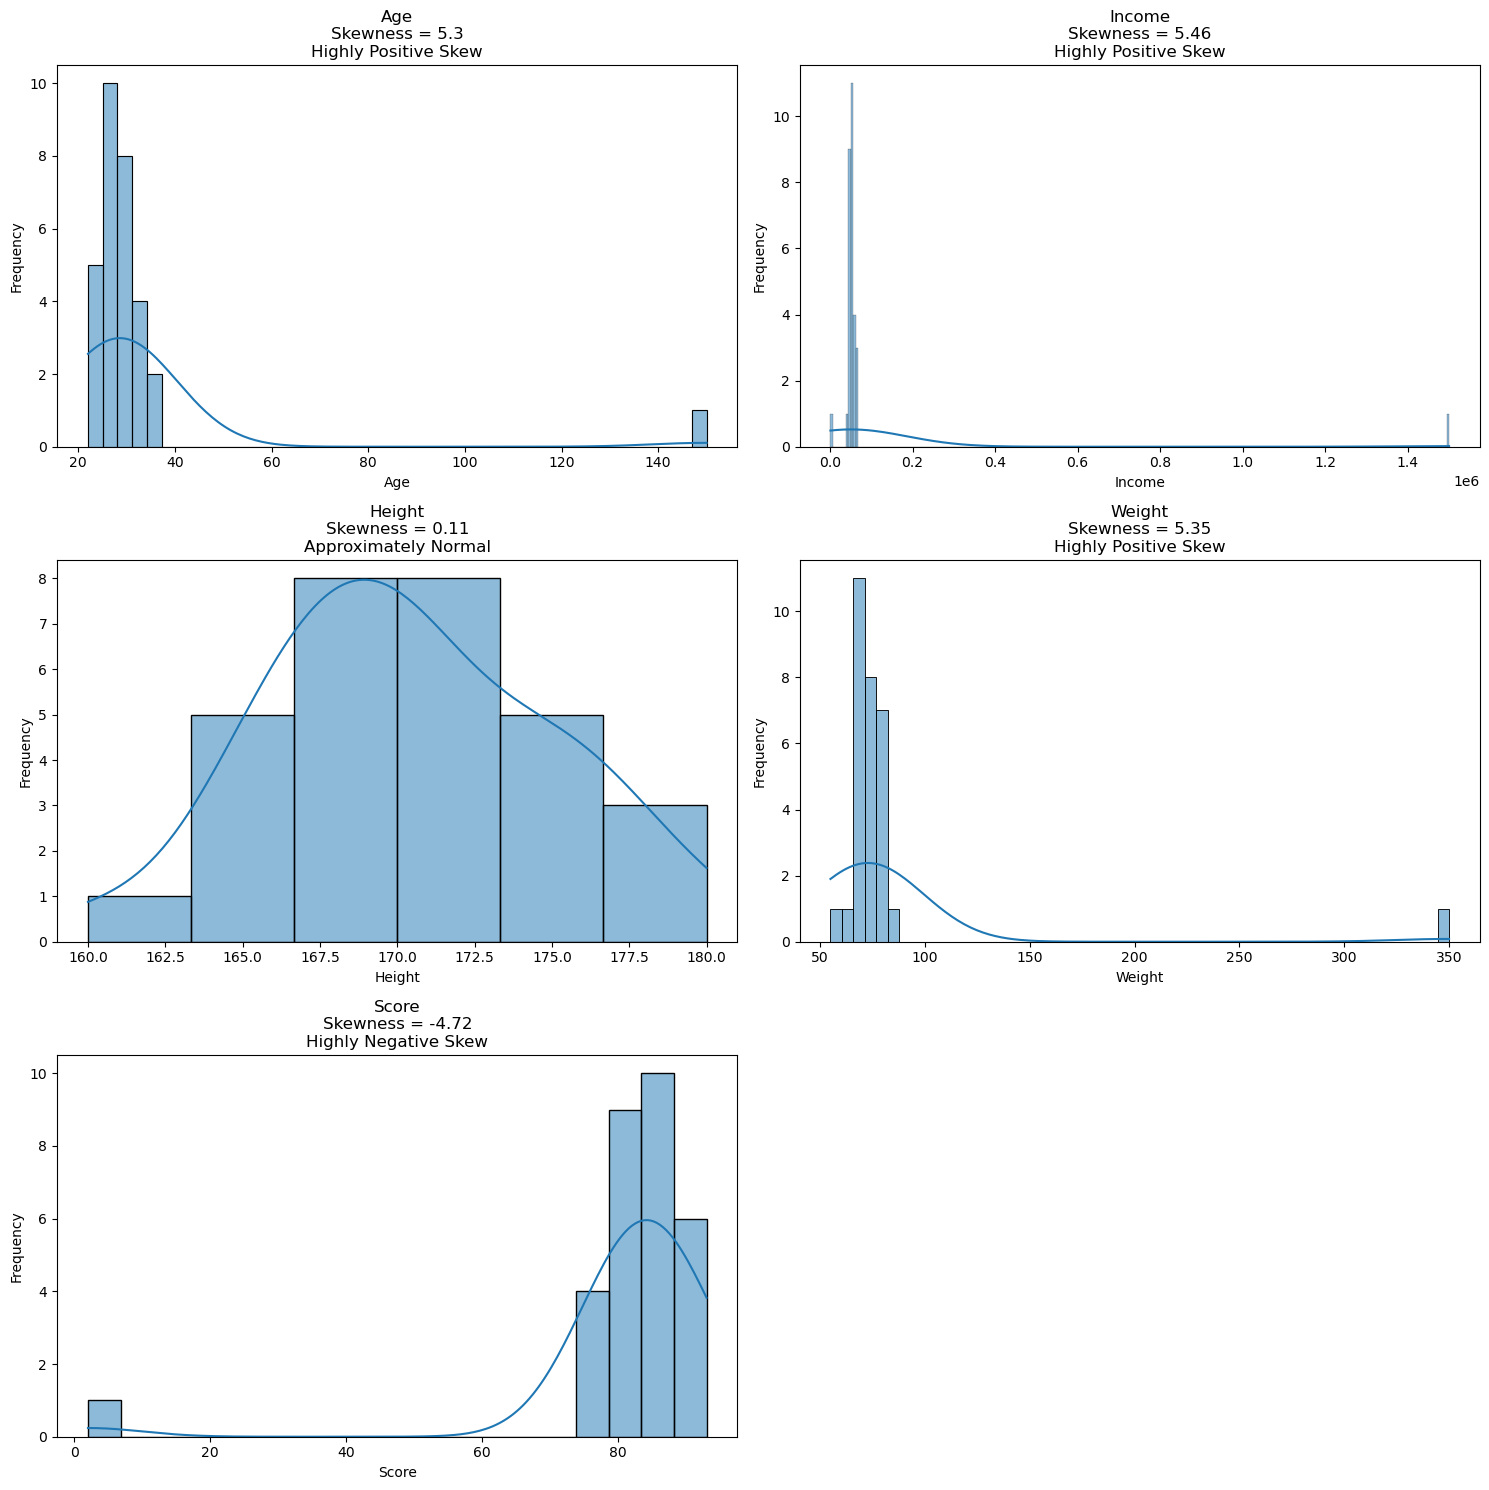

In [80]:
# STEP: Distribution Plot for ALL Numeric Columns
# This will:
# 1. Plot histogram + KDE curve
# 2. Calculate skewness
# 3. Automatically label distribution type inside each plot

# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Set subplot layout (same logic as step 2)
n_cols = 2
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

plt.figure(figsize=(15, 5 * n_rows))

# Loop through each numeric column
for i, col in enumerate(numeric_cols, 1):
    
    plt.subplot(n_rows, n_cols, i)
    
    # Plot histogram with KDE
    sns.histplot(df[col], kde=True)
    
    # Calculate skewness
    skew_value = df[col].skew()
    
    # Automatically classify distribution type
    if -0.5 <= skew_value <= 0.5:
        dist_type = "Approximately Normal"
    elif 0.5 < skew_value <= 1:
        dist_type = "Moderately Positive Skew"
    elif skew_value > 1:
        dist_type = "Highly Positive Skew"
    elif -1 <= skew_value < -0.5:
        dist_type = "Moderately Negative Skew"
    else:
        dist_type = "Highly Negative Skew"
    
    # Add title with skewness value
    plt.title(f"{col}\nSkewness = {round(skew_value, 2)}\n{dist_type}")
    
    # Label axes
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

#### **Step 4: Detect Outliers Using Z-Score Method**

In [81]:
# Create a copy of numeric data
numeric_df = df[numeric_cols]

# Calculate Z-scores for each numeric column
z_scores = np.abs(stats.zscore(numeric_df))

# Convert to DataFrame (so column names remain visible)
z_scores_df = pd.DataFrame(z_scores, columns=numeric_cols)

# Create mask where True means outlier (Z > 3)
outlier_mask = z_scores_df > 3

# Extract rows where ANY column has outlier
outliers = df[outlier_mask.any(axis=1)]

# Display detected outliers
outliers


,Age,Income,Height,Weight,Score
10,150,60000,171,73,86
14,30,1500000,173,77,91
22,35,67000,180,350,90
28,33,63000,176,82,2


#### **Step 5: Validate and Document Result**

In [82]:
# Total number of outlier rows
print("Total Outlier Rows:", len(outliers))

# Percentage of dataset flagged as outlier
percentage = round((len(outliers) / len(df)) * 100, 2)
print("\nPercentage of Outliers:", percentage, "%")

# Column-wise outlier count
column_outliers = outlier_mask.sum()
print("\nColumn-wise Outlier Count:", column_outliers.to_dict())

Total Outlier Rows: 4

Percentage of Outliers: 13.33 %

Column-wise Outlier Count: {'Age': 1, 'Income': 1, 'Height': 0, 'Weight': 1, 'Score': 1}


#### **Step 6: Apply Z-Score Removal or Capping (ML Perspective)**

In [76]:
# Option A: Remove Outliers (Recommended if very few)

# Keep only rows where ALL columns have Z-score <= 3
df_clean = df[(z_scores_df <= 3).all(axis=1)]

# Reset index (important for ML models)
df_clean = df_clean.reset_index(drop=True)

print("Shape after removing outliers:", df_clean.shape)

# Replace original dataset (optional)
df = df_clean.copy()

Shape after removing outliers: (26, 5)


In [83]:
# Option B: Z-Score Capping (Winsorization using ±3)

# Create copy
df_capped = df.copy()

# Loop through each numeric column
for col in numeric_cols:
    
    # Calculate mean and std
    mean = df[col].mean()
    std = df[col].std()
    
    # Define boundaries
    upper_limit = mean + 3 * std
    lower_limit = mean - 3 * std
    
    # Cap values below lower limit
    df_capped[col] = np.where(
        df_capped[col] < lower_limit,
        lower_limit,
        df_capped[col]
    )
    
    # Cap values above upper limit
    df_capped[col] = np.where(
        df_capped[col] > upper_limit,
        upper_limit,
        df_capped[col]
    )

df_capped = df_capped.round(2) # Round to 2 decimal places for cleaner output

# Replace original dataset (optional)
df = df_capped.copy()

df

,Age,Income,Height,Weight,Score
0,25.00,45000.00,165.0,68.00,85.00
1,30.00,52000.00,170.0,72.00,78.00
2,28.00,48000.00,168.0,70.00,82.00
3,35.00,65000.00,175.0,80.00,90.00
4,22.00,38000.00,160.0,55.00,75.00
5,27.00,50000.00,172.0,75.00,88.00
6,32.00,58000.00,178.0,82.00,92.00
7,29.00,51000.00,169.0,71.00,80.00
8,26.00,47000.00,166.0,67.00,83.00
9,31.00,55000.00,174.0,78.00,87.00


In [84]:
# Save cleaned dataset to CSV (optional)
df.to_csv("cleaned_dataset.csv", index=False)